**Source**
https://www.youtube.com/watch?v=azXCzI57Yfc
https://keras.io/guides/training_with_built_in_methods/
https://www.youtube.com/watch?v=5gLarqG8p4s
https://colah.github.io/posts/2014-10-Visualizing-MNIST/
https://www.youtube.com/watch?v=u5VCZBUNOcA
https://www.youtube.com/watch?v=4R7mA_AJxK8
https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
https://www.youtube.com/watch?v=r-vYJqcFxBI


**Introduction**
The MNIST database (Modified National Institute of Standards and Technology database[1]) is a large database of handwritten digits that is commonly used for training various image processing systems.
The MNIST database contains 60,000 training images and 10,000 testing images.

Importing mnist from keras and other libraries that would help to accomplish the discriminant analysis



# Problem_set_1 Task-1

Importing dataset from keras and using mnist to get the trained and test images

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import math




Loading the datasets in to training and testing datasets which consists of training images and test images and there are 60000 training images of 28,28 pixels each and y is a group of 1,2,3....9, also converting them into an array of 28 x 28 using numpy. 

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Train', len(x_train), len(y_train))
print('Test', (x_test.shape, y_test.shape))

Train 60000 60000
Test ((10000, 28, 28), (10000,))


Concatenating the two lists, initializing ten list and concatenating y_train with them. Basically combining labels with image.  

In [29]:
c1,c2,c3,c4,c5,c6,c7,c8,c9,c0 = [],[],[],[],[],[],[],[],[],[]
concatenate_list = [c0,c1,c2,c3,c4,c5,c6,c7,c8,c9]  
#a list that will hold the value of seperated 60000 matrices to the respective categories matched with respective images.
#the list concatenate_list will hold 60000 values in 10 columns.

for i in range (60000):
    label = y_train[i]
    concatenate_list[label].append(np.array(x_train[i]))

#print(len(concatenate_list))




testing np.sum to figure out how it is different from sum done using for loop

In [30]:
concatenate_list[0][0].shape
test = [1,2,3,4]
sum_t2 = 0
sum_test = np.sum(test,0,dtype=np.float32)
for i in range(0,len(test)):
    sum_t2 = sum_t2 + test[i]
print("for loop sum", sum_t2)
print("numpy sum", sum_test)
print(len(test))

for loop sum 10
numpy sum 10.0
4


Finding the elementwise mean and standard deviation to obtain mean image matrix and standard deviation image matrix.

In [31]:
def elementwise_mean(e_m):
    sum = np.sum(e_m,0,dtype=np.float32)
    mean = sum/len(e_m)
    return mean
def elementwise_sd(e_m,mean):
    sum_d = 0
    for i in range (0,len(e_m)):
        sum_d = sum_d + ((e_m[i]-mean)**2)
    standard_deviation = sum_d/len(e_m)
    standard_deviation = np.sqrt(standard_deviation)
    return standard_deviation


Plotting the image matrix.

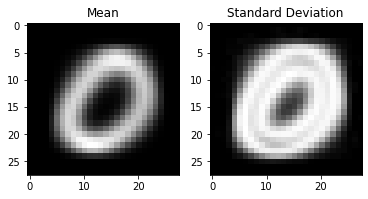

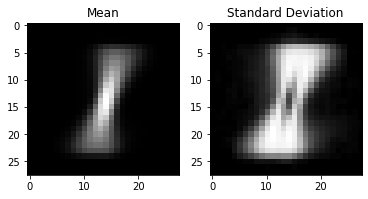

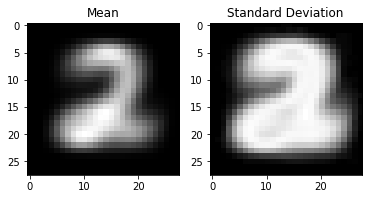

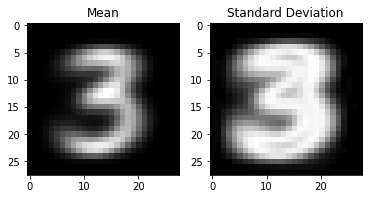

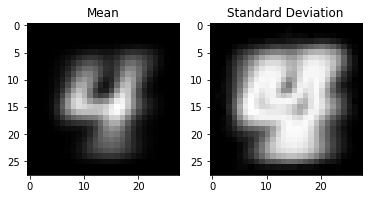

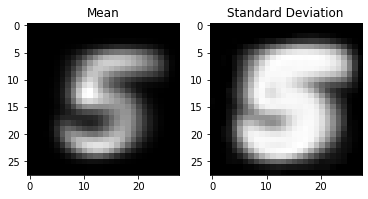

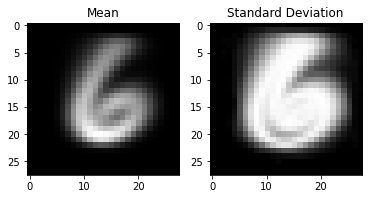

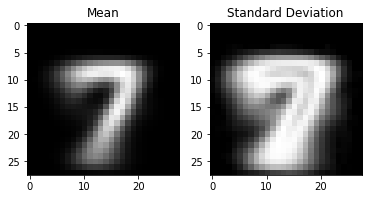

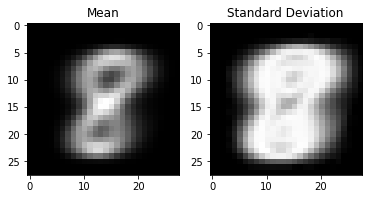

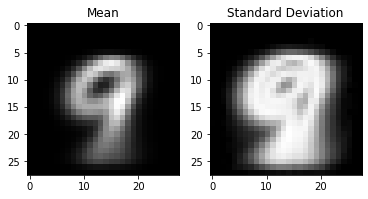

In [32]:

%matplotlib inline

mean_list = []
standard_deviation_list = []

for i in range(0,10):
    mean = elementwise_mean(concatenate_list[i])
    standard_deviation = elementwise_sd(concatenate_list[i],mean)
    mean_list.append(mean)
    standard_deviation_list.append(standard_deviation)
    
for j in range(0,10):
    
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1) #forming 1x2 grid 1st subplot
    imgplot = plt.imshow(mean_list[j],cmap='gray') #plotting mean
    a.set_title('Mean')
    a = fig.add_subplot(1, 2, 2) #filling 2nd subplot in the grid with standard deviation
    imgplot = plt.imshow(standard_deviation_list[j],cmap='gray')
    a.set_title('Standard Deviation')

# Problem_set_1, Task_2

Classify the images in the testing dataset using 0-1 loss function and Bayesian Decision Rule and report the performance.

In [52]:
   
def model(x_test, y_test, mean_list):
    categories_prob = {}
    for i in range(0,10):
        categories_prob[i] = y_test.tolist().count(i)
    d = 2 # dimension
    pred = []
    img_mean = 0
    g = {}
    for j in range(0,10):

        img_mean = img_mean + ((x_test[j]-mean_list[j]))
        cov_mean_inv = np.dot(np.linalg.inv(np.cov(mean_list[j]) + (np.identity(x_test) * 0.1)), img_mean)
        g[j] = (np.subtract(np.dot(np.reshape(img_mean, (x_test**2, 1)).T, np.reshape(cov_mean_inv, (x_test**2, 1))).flatten()*(-0.5), ((d/2)*(np.log(2*(math.pi))))) + ((0.5)*(np.log(np.linalg.det(np.cov(mean_list[j]) + + (np.identity(x_test) * 0.1))))) + (np.log(categories_prob[j])))        
    pred.append(max(g.items(), key = operator.itemgetter(1))[0])
    return pred


In [55]:
test_pred = model(x_test, y_test, mean_list)
error = 0
real  = 0
for k in range(0,y_test.shape[0]):
    error = error + ((y_test[k]-test_pred[k]))
    if(y_test[k] == test_pred[k]):
        real = real+1
accuracy = real/test_pred.shape[0]
Error = error/test_pred.shape[0] 

print('Accuracy - ',accuracy*100,'%')
print('Error - ',Error*100,'%')
 


Accuracy -  87.3 %
Error -  45.300000000000004 %


Question: Why discriminant function of book doesn't perform as good as many other methods on LeCun's web page?

Answer: Linear discriminant analysis(LDA) is a classifier with linear decision boundary which is acquired by fitting class conditional probabilities and bayesian decision theory.
However, the methods given in LuCan's page are non-linear that due to which classification can be done better and also efficiency can be increased.